In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



2023-03-31 09:18:14.071118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Data Generation
observations=1000


In [7]:
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2*xs-3*zs+5+noise

In [6]:
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)


In [9]:
training_data=np.load('TF_intro.npz')

In [14]:
input_size=2
output_size=1
model=tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile (optimizer='sgd',loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 40.1600 - 353ms/epoch - 11ms/step
Epoch 2/100
32/32 - 0s - loss: 4.5223 - 54ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 1.5439 - 54ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6447 - 55ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4200 - 53ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3569 - 48ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3439 - 62ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3306 - 74ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3289 - 80ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3351 - 53ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3331 - 52ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3353 - 55ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3321 - 51ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3353 - 53ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3311 - 60ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3351 - 58ms/epoch - 2ms/ste

In [15]:
## Extract the weights and bias
model.layers[0].get_weights()
weights=model.layers[0].get_weights()[0]
weights

array([[ 2.008155 ],
       [-3.0026948]], dtype=float32)

In [16]:
bias=model.layers[0].get_weights()[1]
bias

array([5.0089407], dtype=float32)

In [17]:
## Extracts the outpus(make predictions)
model.predict_on_batch(training_data['inputs']).round(1)

2023-03-31 09:39:01.249157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


array([[ 38.9],
       [  2.2],
       [ 49.6],
       [ 24.5],
       [ 21.4],
       [ 10.8],
       [ -5.4],
       [-22. ],
       [ 19.9],
       [-22.7],
       [ -1.6],
       [ 25.9],
       [ 32.8],
       [ -9. ],
       [-14.4],
       [ -7.5],
       [ 36.7],
       [  7.7],
       [-19.5],
       [ 15.9],
       [ 40.2],
       [-14.8],
       [-25.8],
       [ 30.9],
       [ 21.3],
       [ 16.4],
       [ -4.4],
       [ 20.8],
       [ 21.4],
       [ -2.5],
       [-17.8],
       [ -8.8],
       [ -5. ],
       [-22.5],
       [-18.5],
       [ 12. ],
       [  0.8],
       [ -6.6],
       [ 22.1],
       [ 32.8],
       [ -1.7],
       [ -3.1],
       [ 25.4],
       [ 14.8],
       [ 28.9],
       [ 50.9],
       [ 21.5],
       [ 34.5],
       [ 39.8],
       [  3.6],
       [ -7.8],
       [  6.5],
       [  4.7],
       [-10.2],
       [ 20.3],
       [  6.5],
       [ 27.7],
       [-11.9],
       [-19.9],
       [-23.1],
       [ 25.1],
       [ -5.6],
       [

In [18]:
training_data['targets'].round(1)


array([[ 38.8],
       [  2.5],
       [ 49.4],
       [ 23.7],
       [ 21.9],
       [ 11.6],
       [ -5.8],
       [-21. ],
       [ 19.3],
       [-22.6],
       [ -1.9],
       [ 25.4],
       [ 33.7],
       [ -8.1],
       [-13.7],
       [ -8.5],
       [ 36.7],
       [  7.8],
       [-19.8],
       [ 16.5],
       [ 40.6],
       [-15.6],
       [-26.5],
       [ 31.4],
       [ 21.1],
       [ 17.2],
       [ -5.2],
       [ 21.7],
       [ 21.8],
       [ -1.8],
       [-18.6],
       [ -8.4],
       [ -5.2],
       [-22.7],
       [-18.3],
       [ 12.6],
       [  1.6],
       [ -6.4],
       [ 22.4],
       [ 33.6],
       [ -1.4],
       [ -2.7],
       [ 26.1],
       [ 13.8],
       [ 28.3],
       [ 50.6],
       [ 21.4],
       [ 34.4],
       [ 40.4],
       [  3.5],
       [ -7.3],
       [  7.5],
       [  5.6],
       [ -9.7],
       [ 21.1],
       [  5.5],
       [ 26.7],
       [-12.8],
       [-19.2],
       [-23.7],
       [ 24.3],
       [ -5.7],
       [

2023-03-31 09:43:00.618759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


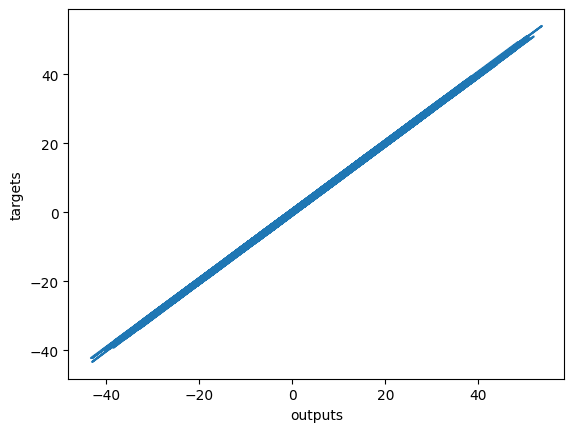

In [20]:
##Plotting the data
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [19]:
help(np.squeeze)

Help on function squeeze in module numpy:

squeeze(a, axis=None)
    Remove axes of length one from `a`.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        .. versionadded:: 1.7.0
    
        Selects a subset of the entries of length one in the
        shape. If an axis is selected with shape entry greater than
        one, an error is raised.
    
    Returns
    -------
    squeezed : ndarray
        The input array, but with all or a subset of the
        dimensions of length 1 removed. This is always `a` itself
        or a view into `a`. Note that if all axes are squeezed,
        the result is a 0d array and not a scalar.
    
    Raises
    ------
    ValueError
        If `axis` is not None, and an axis being squeezed is not of length 1
    
    See Also
    --------
    expand_dims : The inverse operation, adding entries of length one
    reshape : Insert, remove, and combine dimensions, and resi